In [414]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D,Dense,BatchNormalization, Dropout, MaxPooling2D, Flatten
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
%matplotlib inline

In [415]:
train = pd.read_csv(r'E:\INCEPTEZ\Training\Basics_python\Deep_Learning_fashion_apparels\train.csv')
test = pd.read_csv(r'E:\INCEPTEZ\Training\Basics_python\Deep_Learning_fashion_apparels\test.csv')
sample = pd.read_csv(r'E:\INCEPTEZ\Training\Basics_python\Deep_Learning_fashion_apparels\sample_submission_I5njJSF.csv')

In [416]:
os.getcwd()

'E:\\INCEPTEZ\\Training\\Basics_python\\Deep_Learning_fashion_apparels\\train'

In [417]:
os.chdir(r'E:\INCEPTEZ\Training\Basics_python\Deep_Learning_fashion_apparels\train')

In [418]:
train.shape, test.shape

((60000, 2), (10000, 1))

In [419]:
train.head()

,id,label
0,1,9
1,2,0
2,3,0
3,4,3
4,5,0


In [420]:
import skimage
from skimage import io
from tensorflow.keras.utils import to_categorical 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [421]:
skimage.io.imread

<function skimage.io._io.imread(fname, as_gray=False, plugin=None, **plugin_args)>

In [422]:
all_images = []
# for image_path in os.listdir(r'E:\INCEPTEZ\Training\Basics_python\Deep_Learning_fashion_apparels\train'):
for i in range(1,len(train)-50000):
    img = image.load_img(r'E:\INCEPTEZ\Training\Basics_python\Deep_Learning_fashion_apparels\train/' + str(i) + '.png',grayscale=True)
    img_arr = image.img_to_array(img)
    all_images.append(img_arr)
x = np.array(all_images)

C:\Users\Muthukumaran\anaconda3\lib\site-packages\keras\utils\image_utils.py:382: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [423]:
y = train['label'].values

In [424]:
y = y[0:9999]

In [425]:
y = to_categorical(y)

In [426]:
y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [427]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((9999,), (3000, 28, 28, 1), (6999, 10), (3000, 10))

In [428]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=21)

In [429]:
    models = Sequential()
     
    # We are learning 64
    # filters with a kernal size of 5x5
    models.add(Conv2D(64, (5, 5),
                      padding="same",
                      activation="relu",
                      input_shape=(28, 28, 1)))
     
    # Max pooling will reduce the
    # size with a kernal size of 2x2
    models.add(MaxPooling2D(pool_size=(2, 2)))
    models.add(Conv2D(128, (5, 5), padding="same",
                      activation="relu"))
     
    models.add(MaxPooling2D(pool_size=(2, 2)))
    models.add(Conv2D(256, (5, 5), padding="same",
                      activation="relu"))
     
    models.add(MaxPooling2D(pool_size=(2, 2)))
     
    # Once the convolutional and pooling
    # operations are done the layer
    # is flattened and fully connected layers
    # are added
    models.add(Flatten())
    models.add(Dense(256, activation="relu"))
     
    # Finally as there are total 10
    # classes to be added a FCC layer of
    # 10 is created with a softmax activation
    # function
    models.add(Dense(10, activation="softmax"))


In [430]:
models.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])


In [431]:
models.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 14, 14, 128)       204928    
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 7, 7, 256)         819456    
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 3, 3, 256)      

In [432]:
y_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [433]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6999, 28, 28, 1), (3000, 28, 28, 1), (6999, 10), (3000, 10))

In [434]:
history = models.fit(x_train, y_train, validation_split = 0.2, epochs=20, steps_per_epoch=100,batch_size = 10, verbose=2)

Epoch 1/20
100/100 - 14s - loss: 3.8072 - categorical_accuracy: 0.6240 - val_loss: 0.7092 - val_categorical_accuracy: 0.7550 - 14s/epoch - 136ms/step
Epoch 2/20
100/100 - 13s - loss: 0.7052 - categorical_accuracy: 0.7530 - val_loss: 0.8559 - val_categorical_accuracy: 0.7057 - 13s/epoch - 135ms/step
Epoch 3/20
100/100 - 13s - loss: 0.6298 - categorical_accuracy: 0.7720 - val_loss: 0.6487 - val_categorical_accuracy: 0.7343 - 13s/epoch - 127ms/step
Epoch 4/20
100/100 - 12s - loss: 0.5750 - categorical_accuracy: 0.7970 - val_loss: 0.6442 - val_categorical_accuracy: 0.7657 - 12s/epoch - 123ms/step
Epoch 5/20
100/100 - 13s - loss: 0.5804 - categorical_accuracy: 0.8130 - val_loss: 0.5794 - val_categorical_accuracy: 0.7886 - 13s/epoch - 131ms/step
Epoch 6/20
100/100 - 13s - loss: 0.5373 - categorical_accuracy: 0.8168 - val_loss: 0.5301 - val_categorical_accuracy: 0.7886 - 13s/epoch - 130ms/step
Epoch 7/20
100/100 - 13s - loss: 0.4745 - categorical_accuracy: 0.8260 - val_loss: 0.5360 - val_cate

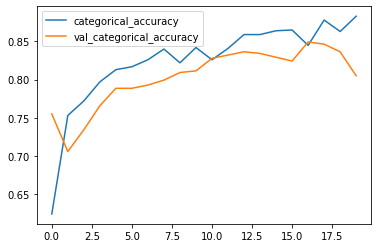

In [440]:

plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.legend(['categorical_accuracy','val_categorical_accuracy'])

In [441]:
model.evaluate(x_train, y_train)

219/219 [==============================] - 1s 3ms/step - loss: 59.5986 - categorical_accuracy: 0.6647


[59.5986328125, 0.6646663546562195]

In [442]:
model.evaluate(x_test, y_test)

94/94 [==============================] - 0s 3ms/step - loss: 58.9769 - categorical_accuracy: 0.6813


[58.97692108154297, 0.6813333630561829]

In [447]:
test_images = []
for i in range(60001,60001+len(test)):
    img = image.load_img(r'E:\INCEPTEZ\Training\Basics_python\Deep_Learning_fashion_apparels\test/' + str(i) + '.png',grayscale=True,target_size=(28,28,1))
    img_arr = image.img_to_array(img)
    test_images.append(img_arr)
test = np.array(test_images)

In [462]:
y_pred = model.predict(x_test)

94/94 [==============================] - 0s 3ms/step


In [471]:
y_classes = [np.argmax(i) for i  in y_pred]
y_classes[0:5]

[0, 3, 4, 9, 0]